In [1]:
import pandas as pd

In [5]:
df = pd.read_pickle("llama_finetuned_predictions_fulltext_clean.pkl")
df

,Gold published date,url,text version,text,predicted_date,predicted_date_clean
0,31/01/2024,https://www.saintcyr78.fr/wp-content/uploads/2...,https://datapolitics-public.s3.gra.io.cloud.ov...,REPUBLIQUE FRANCAISE\nLiberté - Egalité - Frat...,{'predicted_date' : '06/02/2024'},06/02/2024
1,01/09/2019,https://www.manche.gouv.fr/contenu/telechargem...,https://datapolitics-public.s3.gra.io.cloud.ov...,PREFET DE LA MANCHE\n\nRECUEIL DES ACTES\nADMI...,{'predicted_date' : '02/09/2019'},02/09/2019
2,02/02/2023,https://www.suresnes.fr/wp-content/uploads/202...,https://datapolitics-public.s3.gra.io.cloud.ov...,VILLE DE SURESNES\nConseil Municipal\nSéance d...,{'predicted_date' : '02/02/2023'},02/02/2023
3,17/12/2020,https://www.hautesavoie.fr/sites/default/files...,https://datapolitics-public.s3.gra.io.cloud.ov...,Recueil des Actes Administratifs\n\nRegistre d...,{'predicted_date' : '07/12/2020'},07/12/2020
4,06/07/2020,https://www.lombez-gers.com/uploads/documents/...,https://datapolitics-public.s3.gra.io.cloud.ov...,Procès-verbal de la séance du Conseil Municipa...,{'predicted_date' : '06/07/2020'},06/07/2020
...,...,...,...,...,...,...
136,23/02/2023,https://www.villeneuve-yonne.fr/wp-content/upl...,https://datapolitics-public.s3.gra.io.cloud.ov...,République Française N ü \ A Département de l'...,{'predicted_date' : '23/02/2023'},23/02/2023
137,07/03/2023,https://www.ville-noisiel.fr/wp-content/upload...,https://datapolitics-public.s3.gra.io.cloud.ov...,Envoyé en préfecture le 07/03/2023\nReçu en pr...,{'predicted_date' : '07/03/2023'},07/03/2023
138,02/03/2022,https://www.sud-retz-atlantique.fr/wp-content/...,https://datapolitics-public.s3.gra.io.cloud.ov...,PUBLICATION DÉLIBÉRATIONS COMMUNAUTAIRES_ANNÉE...,{'predicted_date' : '30/03/2022'},30/03/2022
139,2022,https://www.alpes-de-haute-provence.gouv.fr/co...,https://datapolitics-public.s3.gra.io.cloud.ov...,Ez\nPRÉFETE\n\nDES ALPES-\nDE-HAUTE-\nPROVENCE...,{'predicted_date' : '17/03/2022'},17/03/2022


In [21]:
import re
import ast
def extract_predicted_date(text):
    try:
        json_match = re.search(r"{.*?}", text)
        if json_match:
            json_str = json_match.group(0)
            json_data = ast.literal_eval(json_str)
            return json_data.get('predicted_date', None)
    except (SyntaxError, ValueError):
        print(f'no json found in {text}')
    return None

In [ ]:
df = df[~df['Gold published date'].isin(["Date not found.","Date not found"])]  # filtering out the examples without reference

In [23]:
df['preds_years'] = df['predicted_date'].apply(extract_predicted_date)

In [27]:
import datetime

df['dt_ref'] = pd.to_datetime(df['Gold published date'], format='mixed',dayfirst=True)# format='%d/%m/%Y'
df['dt_pred'] = pd.to_datetime(df['preds_years'], format='mixed',dayfirst=True)
df['difference_days'] = (df['dt_ref'] - df['dt_pred']).abs().dt.days

In [46]:
df

,Gold published date,url,text version,text,predicted_date,predicted_date_clean,dt_ref,preds_years,dt_pred,difference_days
0,31/01/2024,https://www.saintcyr78.fr/wp-content/uploads/2...,https://datapolitics-public.s3.gra.io.cloud.ov...,REPUBLIQUE FRANCAISE\nLiberté - Egalité - Frat...,{'predicted_date' : '06/02/2024'},06/02/2024,2024-01-31,06/02/2024,2024-02-06,6
1,01/09/2019,https://www.manche.gouv.fr/contenu/telechargem...,https://datapolitics-public.s3.gra.io.cloud.ov...,PREFET DE LA MANCHE\n\nRECUEIL DES ACTES\nADMI...,{'predicted_date' : '02/09/2019'},02/09/2019,2019-09-01,02/09/2019,2019-09-02,1
2,02/02/2023,https://www.suresnes.fr/wp-content/uploads/202...,https://datapolitics-public.s3.gra.io.cloud.ov...,VILLE DE SURESNES\nConseil Municipal\nSéance d...,{'predicted_date' : '02/02/2023'},02/02/2023,2023-02-02,02/02/2023,2023-02-02,0
3,17/12/2020,https://www.hautesavoie.fr/sites/default/files...,https://datapolitics-public.s3.gra.io.cloud.ov...,Recueil des Actes Administratifs\n\nRegistre d...,{'predicted_date' : '07/12/2020'},07/12/2020,2020-12-17,07/12/2020,2020-12-07,10
4,06/07/2020,https://www.lombez-gers.com/uploads/documents/...,https://datapolitics-public.s3.gra.io.cloud.ov...,Procès-verbal de la séance du Conseil Municipa...,{'predicted_date' : '06/07/2020'},06/07/2020,2020-07-06,06/07/2020,2020-07-06,0
...,...,...,...,...,...,...,...,...,...,...
136,23/02/2023,https://www.villeneuve-yonne.fr/wp-content/upl...,https://datapolitics-public.s3.gra.io.cloud.ov...,République Française N ü \ A Département de l'...,{'predicted_date' : '23/02/2023'},23/02/2023,2023-02-23,23/02/2023,2023-02-23,0
137,07/03/2023,https://www.ville-noisiel.fr/wp-content/upload...,https://datapolitics-public.s3.gra.io.cloud.ov...,Envoyé en préfecture le 07/03/2023\nReçu en pr...,{'predicted_date' : '07/03/2023'},07/03/2023,2023-03-07,07/03/2023,2023-03-07,0
138,02/03/2022,https://www.sud-retz-atlantique.fr/wp-content/...,https://datapolitics-public.s3.gra.io.cloud.ov...,PUBLICATION DÉLIBÉRATIONS COMMUNAUTAIRES_ANNÉE...,{'predicted_date' : '30/03/2022'},30/03/2022,2022-03-02,30/03/2022,2022-03-30,28
139,2022,https://www.alpes-de-haute-provence.gouv.fr/co...,https://datapolitics-public.s3.gra.io.cloud.ov...,Ez\nPRÉFETE\n\nDES ALPES-\nDE-HAUTE-\nPROVENCE...,{'predicted_date' : '17/03/2022'},17/03/2022,2022-01-01,17/03/2022,2022-03-17,75


# Mean number of days between prediction and reference

In [39]:
print(df['difference_days'].mean())

84.53237410071942


In [48]:
(df['difference_days']<5).mean()

0.762589928057554

<Axes: xlabel='difference_days'>

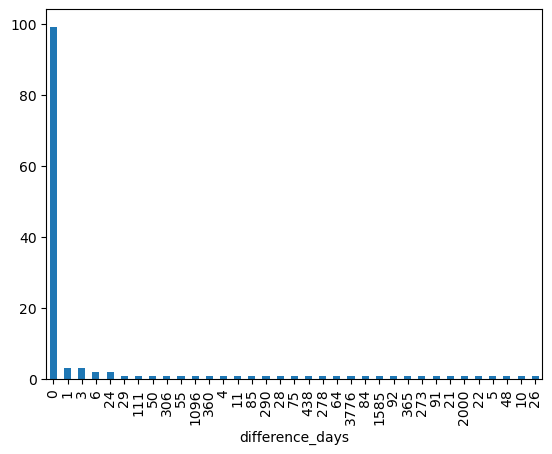

In [37]:
df['difference_days'].value_counts().plot(kind='bar')

In [ ]:
acc_strict = (df['dt_ref'] == df['dt_pred']).mean()
print(f"Exact date prediction accuracy : {acc_strict*100:.2f}%")
acc_year_month = ((df['dt_ref'].dt.month == df['dt_pred'].dt.month) & (df['dt_ref'].dt.year == df['dt_pred'].dt.year)).mean()
print(f"Accuracy of predicting the correct month and year : {acc_year_month*100:.2f}%")
acc_year = (df['dt_ref'].dt.year == df['dt_pred'].dt.year).mean()
print(f"Accuracy of predicting the correct year : {acc_year*100:.2f}%")
acc_less_than_5_diff = (df['difference_days']<5).mean()
print(f"Accuracy when a difference of less than 5 days is considered as a correct prediction: {acc_less_than_5_diff*100:.2f}%")

Exact date prediction accuracy : 71.22%
Accuracy of predicting the correct month and year : 82.01%
Accuracy of predicting the correct year : 92.81%
Accuracy when a difference of less than 5 days is considered as a correct prediction: 76.26
